# Gradient Descent Implementation in Linear Regression


In this notebook, we'll build a linear regression model to predict **Sales** using an appropriate predictor variable.

### Importing necessary library

In [14]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In above dataset TV as our predictor variable and Sales will be our target variable.

In [3]:
data.shape

(200, 4)

### Linear regression mathematics

Optimial coefficients are given by the following relation in batch gradient descent

$$ W = (X^{T}X)^{-1} (X^{T}Y)$$

In [4]:
def linear_regression(X, y):
    X_transpose = np.transpose(X)
    lv = np.linalg.inv(np.dot(X_transpose, X))
    rv = np.dot(X_transpose, y)
    return np.dot(lv, rv)

In [5]:
# create X and y

X = data['TV']
y = data['Sales']

In [6]:
# split train and test data using 70-30 rule

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

X_train_sm = sm.add_constant(X_train)

In [7]:
# train model using custom linear regression method

model = linear_regression(X_train_sm, y_train)

In [8]:
# regression coefficients 

beta_0 = round(model[0], 3)
beta_1 = round(model[1], 3)

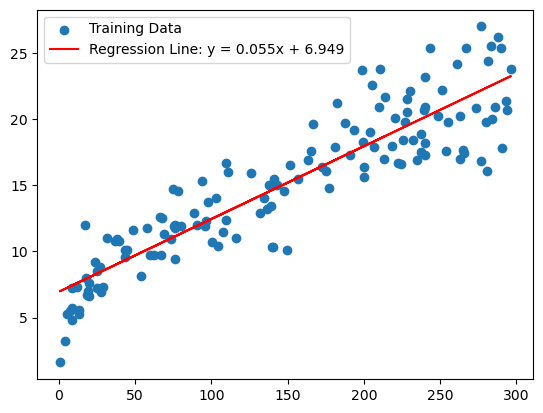

In [9]:
# plot regression line on training set

plt.scatter(X_train, y_train, label = 'Training Data')
plt.plot(X_train, beta_0 + beta_1 * X_train, 'r', label = f'Regression Line: y = {beta_1}x + {beta_0}')
plt.legend()
plt.show()

In [10]:
# r-squared value

y_train_pred = beta_0 + beta_1 * X_train
rss = sum((y_train_pred - y_train) ** 2)
tss = sum((y_train - np.mean(y_train)) ** 2)

r2_train = 1 - (rss / tss)
round(r2_train, 3)

0.816

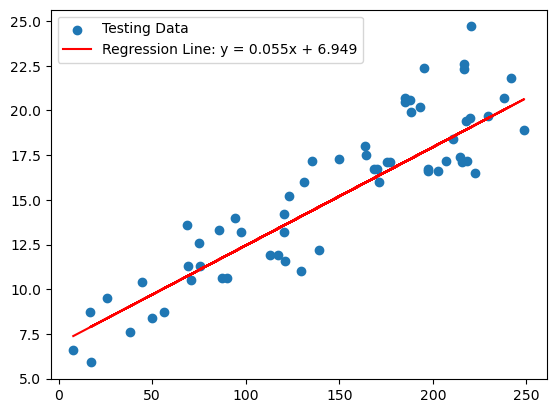

In [11]:
# plot regression line on testing set

plt.scatter(X_test, y_test, label = 'Testing Data')
plt.plot(X_test, beta_0 + beta_1 * X_test, 'r', label = f'Regression Line: y = {beta_1}x + {beta_0}')
plt.legend()
plt.show()

In [12]:
# r-squared value

y_test_pred = beta_0 + beta_1 * X_test
rss = sum((y_test_pred - y_test) ** 2)
tss = sum((y_test - np.mean(y_test)) ** 2)

r2_test = 1 - (rss / tss)
round(r2_test, 3)

0.797

### Gradient descent approach

- The MSE is given by
$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(X.\theta-y)^2$$

- The gradient of MSE is given by
$$J'(\theta) = \frac{2}{m} X^T.(X.\theta - y)$$

- The new vector is geven by
$$\theta_{next step}=\theta-\alpha*J'(\theta)$$

In [84]:
# def gradient_descent(X, y, alpha = 0.01, iterations = 1000):
#     m = len(X)
#     X_b = np.c_[np.ones((m, 1)), X]
#     theta = np.random.randn(2, 1)
    
#     for i in range(0, iterations):
#         X_T = np.transpose(X_b)
#         xx = np.dot(X_b, theta) - np.array(y).reshape(m, 1)
#         grad = 2/m * np.dot(X_T, (xx))
#         theta = theta - (alpha * grad)
#         print(theta)
        
#     return theta

In [118]:
def gradient_descent(X, y, learning_rate=0.05, n_iterations=1000):
    m = len(X)
    X_b = np.c_[np.ones((m, 1)), X]
    w = np.random.randn(2, 1)

    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(w) - y)
        w = w - learning_rate * gradients

    return w

In [114]:
X = np.reshape(X_train, (140, 1))
y = np.reshape(y_train, (140, 1))

In [117]:
gradient_descent(X, y)

array([[inf],
       [inf]])

In [101]:
X = 2 * np.random.rand(100, 1)
y = 2 * X + 1 + np.random.randn(100, 1)

In [102]:
gradient_descent(X, y)

array([[0.67412244],
       [2.21052963]])